In [54]:
import os
import shutil
from sklearn.model_selection import train_test_split
#adtaset is achieved by combinng four datasets 27_7_21.zip ,14_09_21.zip,04_11_21.zip,25_05_22.zip
# Define paths to your dataset folders
data_dir = 'peach_tree_disease'
train_dir = "peach_tree_disease_dataset/train"
test_dir = "peach_tree_disease_dataset/test"
val_dir = "peach_tree_disease_dataset/val"

# Define classes (Healthy, Anarsia lineatella, Grapholita molesta, Dead Trees)
classes = ["Healthy", "Anarsia lineatella", "Grapholita molesta", "Dead Trees"]

# Create train, test, and val directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each class to split the data
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    images = os.listdir(cls_path)
    
    # Split data for this class
    train_images, test_val_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images , test_images= train_test_split(test_val_images, test_size=0.33, random_state=42)
    
    # Move images to appropriate directories
    for img in train_images:
        src = os.path.join(cls_path, img)
        dest = os.path.join(train_dir, cls)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(src, dest)
    
    for img in test_images:
        src = os.path.join(cls_path, img)
        dest = os.path.join(test_dir, cls)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(src, dest)
    
    for img in val_images:
        src = os.path.join(cls_path, img)
        dest = os.path.join(val_dir, cls)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(src, dest)


Found 510 images belonging to 3 classes.
Found 2498 images belonging to 1 classes.
Found 428 images belonging to 4 classes.
Found 865 images belonging to 4 classes.


In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths for train, test, and validation data
train_directory = "peach_tree_disease_dataset/train"
test_directory = "peach_tree_disease_dataset/test"
val_directory = "peach_tree_disease_dataset/val"

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Define image augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess training dataset with augmentation
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess validation dataset
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3008 images belonging to 4 classes.
Found 428 images belonging to 4 classes.
Found 865 images belonging to 4 classes.


In [108]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes(Healthy, Anarsia lineatella, Grapholita molesta, Dead Trees)
])


In [109]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
history = model.fit(
    train_generator,
    
    epochs=10,
    validation_data=val_generator,
    
)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 434s 4s/step - accuracy: 0.7851 - loss: 0.6813 - val_accuracy: 0.8289 - val_loss: 0.8034
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 432s 4s/step - accuracy: 0.8350 - loss: 0.6378 - val_accuracy: 0.8301 - val_loss: 0.5911
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 420s 4s/step - accuracy: 0.8304 - loss: 0.6191 - val_accuracy: 0.8301 - val_loss: 0.6073
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.8335 - loss: 0.6062 - val_accuracy: 0.8358 - val_loss: 0.5827
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 393s 4s/step - accuracy: 0.8326 - loss: 0.6072 - val_accuracy: 0.8277 - val_loss: 0.5973
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 393s 4s/step - accuracy: 0.8336 - loss: 0.6007 - val_accuracy: 0.8289 - val_loss: 0.6004
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 399s 4s/step - accuracy: 0.8353 - loss: 0.6030 - val_accuracy: 0.8254 - val_loss: 0.6385
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - accuracy: 0.8292 - loss: 0.6197 - val_accuracy: 0.8058 - v

In [115]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the evaluation scores
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8590 - loss: 0.5868
Test Loss: 0.670873761177063
Test Accuracy: 0.827102780342102


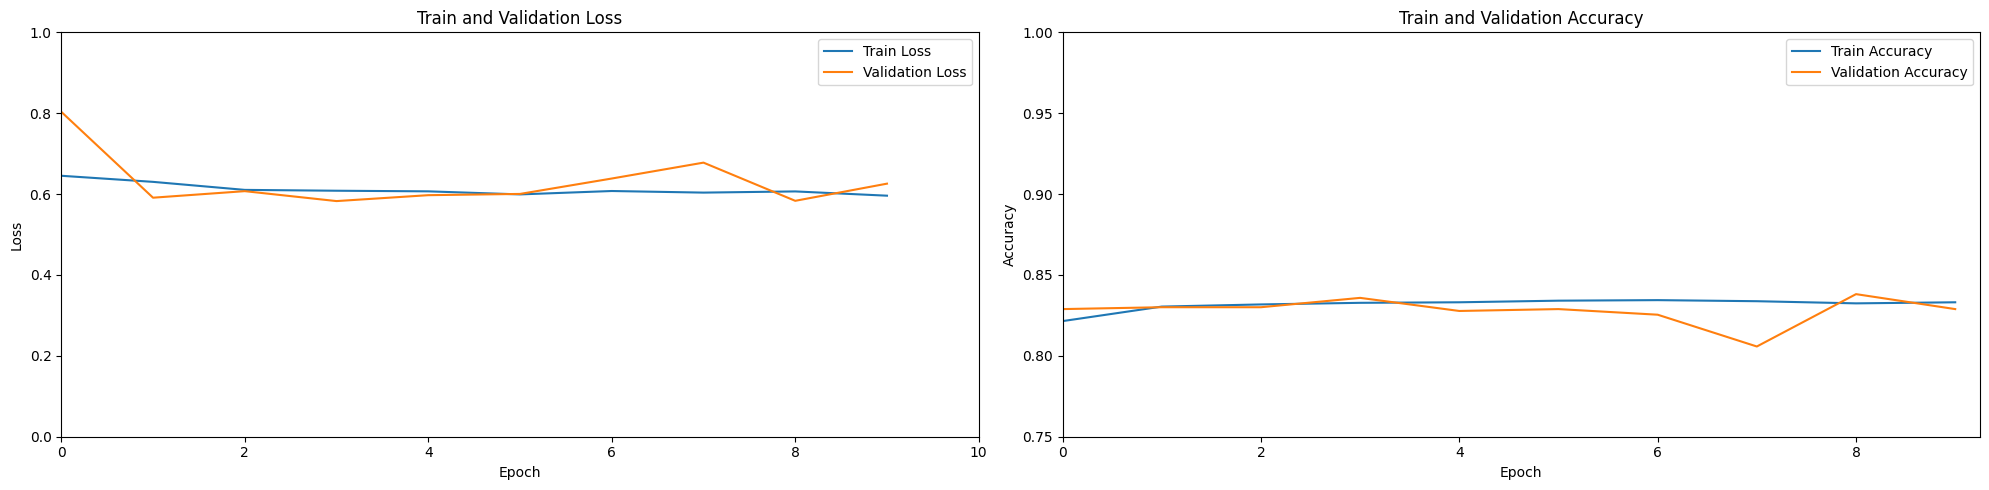

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()


In [147]:
# Save your model
model.save("peach_tree_disease_model.keras")

# If you also want to include the weights of your model, you can do this:
model.save_weights("peach_tree_disease_weights.weights.h5")


In [26]:

# Make predictions
predictions = model.predict(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step


FUNCTION FOR PREDICTION OF IMAGES FROM TEST DIRECTORY (TAKES 12 IMAGES/EXECUTION)

In [145]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
def predict_images(image_paths, model, test_generator):
    predictions = []
    
    for image_path in image_paths:
        # Load and preprocess the image
        image = load_img(image_path, target_size=(img_width, img_height))  # Resize to model input size
        image_array = np.expand_dims(np.array(image), axis=0) / 255.0  # Add batch dimension and normalize
        # Make prediction using the trained model
        prediction = model.predict(image_array)
        # Get the predicted class index
        reverse_class_indices = {v: k for k, v in test_generator.class_indices.items()}
        predicted_class_index = np.argmax(prediction)
        # Get the predicted class label using the reverse mapping
        class_label = reverse_class_indices[predicted_class_index]
        # Append the predicted class label to the list of predictions
        predictions.append(class_label)

    return predictions

# Example usage
test_dir = "peach_tree_disease_dataset/test"
subfolders = [subfolder for subfolder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, subfolder))]
image_paths = []


# Loop until 12 images are collected or subfolders are exhausted
# Define the patterns to be excluded from filenames
excluded_patterns = [ "GRE","NIR","RED","REG"]

# Loop until 12 images are collected or subfolders are exhausted
for _ in range(12):
    # Randomly select a subfolder
    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(test_dir, random_subfolder)
    
    # Get the list of image files in the selected subfolder
    image_files = [file for file in os.listdir(subfolder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
    
    # Filter out filenames containing excluded patterns
    filtered_files = [file for file in image_files if not any(pattern in file for pattern in excluded_patterns)]
    
    # Shuffle the list of filtered image files
    random.shuffle(filtered_files)
    
    # Check if there are valid image files in the subfolder after filtering
    if filtered_files:
        # Select one image randomly from the filtered list
        selected_image = filtered_files[0]
        image_path = os.path.join(subfolder_path, selected_image)
        image_paths.append(image_path)
# Shuffle the list of selected image paths
random.shuffle(image_paths)
# Make predictions for the randomly selected images
predicted_classes = predict_images(image_paths, model, test_generator)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


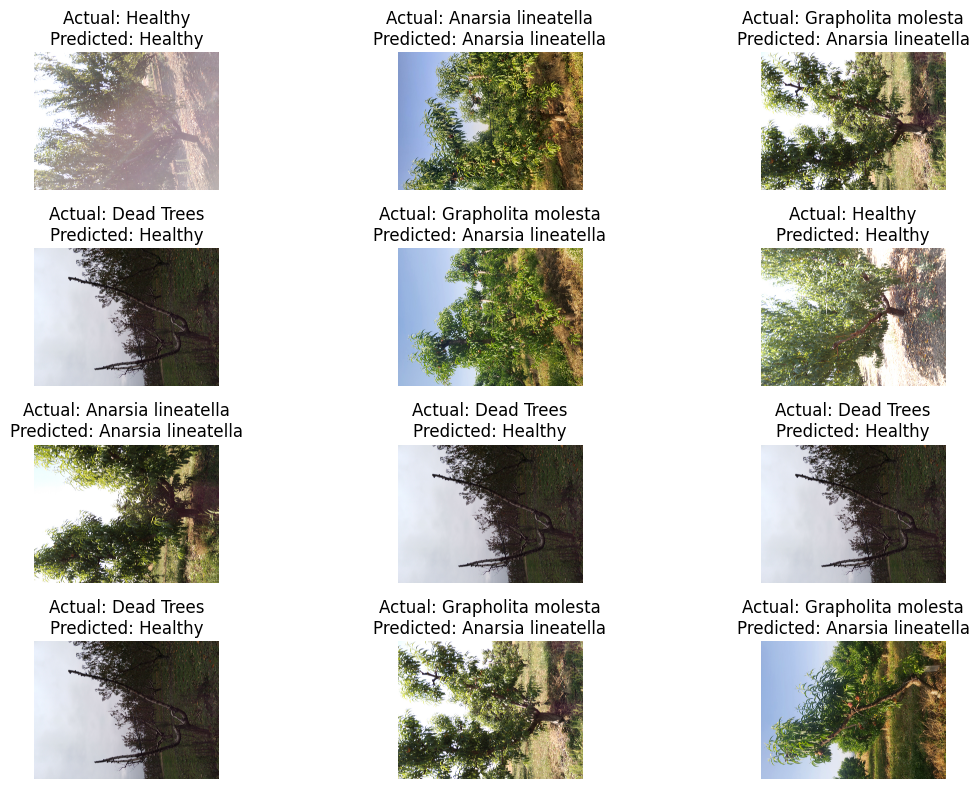

In [146]:
# Display images with actual and predicted class names
plt.figure(figsize=(12, 8))
for i, image_path in enumerate(image_paths):
    image = Image.open(image_path)
    plt.subplot(4, 3, i + 1)
    plt.imshow(image )  # Set aspect='auto' to maintain aspect ratio
    plt.title(f"Actual: {os.path.basename(os.path.dirname(image_path))}\nPredicted: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
